# Simple linear regression - Exercise Solution

Hi HDSD! Time to practice by yourself.

You are given a dataset of Spotify. 

You are expected to create simple linear regressions using the new data. Your goal is to find if any of the music features is a cause of its popularity.

In this exercise, you must define what are the dependent and independent variables.

Criteria: use minimum code (means only the necessary to reach your goal) but explain in comments as much as possible. All your insights must be demonstrated by code run.

Context
This dataset contains audio statistics of the top 2000 tracks on Spotify. The data contains about 15 columns each describing the track and it's qualities. Songs released from 1956 to 2019 are included from some notable and famous artists like Queen, The Beatles, Guns N' Roses, etc.
http://sortyourmusic.playlistmachinery.com/ by @plamere uses Spotify API to extract the audio features from the tracks given the Spotify Playlist URI. This data contains audio features like Danceability, BPM, Liveness, Valence(Positivity) and many more.
Each feature's description has been given in detail below.
Content
* Index: ID
* Title: Name of the Track
* Artist: Name of the Artist
* Top Genre: Genre of the track
* Year: Release Year of the track
* Beats per Minute(BPM): The tempo of the song
* Energy: The energy of a song - the higher the value, the more energtic. song
* Danceability: The higher the value, the easier it is to dance to this song.
* Loudness: The higher the value, the louder the song.
* Valence: The higher the value, the more positive mood for the song.
* Length: The duration of the song.
* Acoustic: The higher the value the more acoustic the song is.
* Speechiness: The higher the value the more spoken words the song contains
* Popularity: The higher the value the more popular the song is.


In [1]:
# Simple Linear Regression Extra
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# we use pandas to import the csv and create a dataframe
data = pd.read_csv('C:/Users/student/Desktop/DS/extra_spotify_2000.csv')

In [3]:
data

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Danceability,Length (Duration),Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,53,201,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,50,207,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,66,341,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,43,269,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,58,256,3,59
...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,70,128,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,36,136,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,53,162,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,45,324,4,65


In [4]:
# we use describe to calculate the summary statistics
data.describe()

,Index,Year,Beats Per Minute (BPM),Danceability,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,53.238215,4.994985,59.52658
std,575.762538,16.116048,28.028096,15.351507,4.401566,14.35160
min,1.000000,1956.000000,37.000000,10.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,43.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,53.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,64.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,96.000000,55.000000,100.00000


In [5]:
y = data['Popularity'] # dependent variable
x1 = data['Danceability'] # independent variable

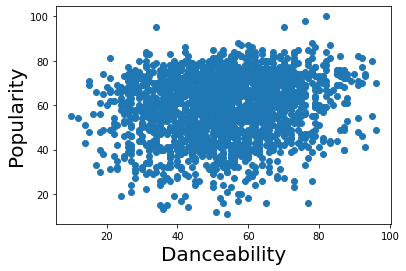

In [6]:
plt.scatter(x1,y) # scatter plot
plt.xlabel('Danceability', fontsize = 20) # x label
plt.ylabel('Popularity', fontsize = 20) # y label
plt.show() # show plot


In [7]:
x = sm.add_constant(x1) # add constant
results = sm.OLS(y,x).fit() # fit model
results.summary() # show results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     42.39
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           9.45e-11
Time:                        23:13:51   Log-Likelihood:                -8119.6
No. Observations:                1994   AIC:                         1.624e+04
Df Residuals:                    1992   BIC:                         1.625e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.3425      1.148     45.579      0.000      50.090      54.595
Danceability     0.1349      0.021      6.511      0.000       0.094       0.176
==============================================================================
Omnibus:                       85.679   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.843
Skew:                          -0.532   Prob(JB):                     1.54e-21
Kurtosis:                       2.858   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

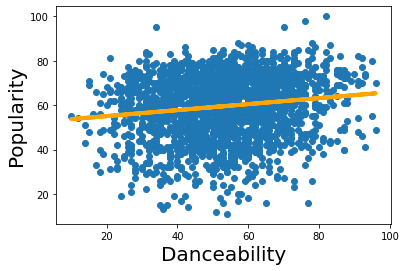

In [8]:
plt.scatter(x1,y) # scatter plot
yhat = 0.1349*x1 + 	52.3425
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line') # plot regression line
plt.xlabel('Danceability', fontsize = 20) # x label
plt.ylabel('Popularity', fontsize = 20) # y label
plt.show() # show plot

In [9]:
y = data['Popularity'] # dependent variable
x2 = data['Beats Per Minute (BPM)'] # independent variable

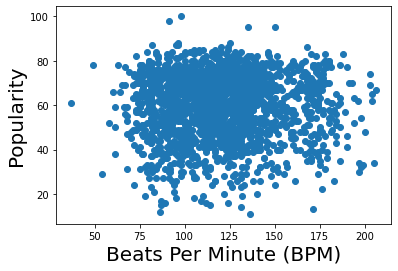

In [10]:
plt.scatter(x2,y) # scatter plot
plt.xlabel('Beats Per Minute (BPM)', fontsize = 20) # x label
plt.ylabel('Popularity', fontsize = 20) # y label
plt.show() # show plot

In [11]:
x = sm.add_constant(x2) # add constant
results = sm.OLS(y,x).fit() # fit model
results.summary() # show results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02016
Date:                Tue, 17 Oct 2023   Prob (F-statistic):              0.887
Time:                        23:13:51   Log-Likelihood:                -8140.6
No. Observations:                1994   AIC:                         1.629e+04
Df Residuals:                    1992   BIC:                         1.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     59.7224      1.416     42.172      0.000      56.945      62.500
Beats Per Minute (BPM)    -0.0016      0.011     -0.142      0.887      -0.024       0.021
==============================================================================
Omnibus:                       85.397   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.724
Skew:                          -0.533   Prob(JB):                     1.64e-21
Kurtosis:                       2.882   Cond. No.                         544.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

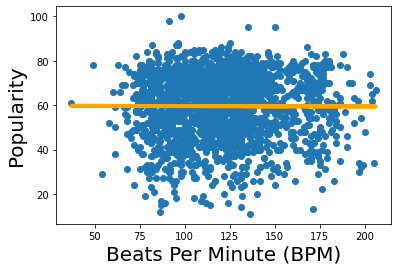

In [12]:
plt.scatter(x2,y) # scatter plot
yhat = -0.0016*x2 + 59.7224
fig = plt.plot(x2,yhat, lw=4, c='orange', label ='regression line') # plot regression line
plt.xlabel('Beats Per Minute (BPM)', fontsize = 20) # x label
plt.ylabel('Popularity', fontsize = 20) # y label
plt.show() # show plot

In [13]:
y = data['Popularity'] # dependent variable
x3 = data['Speechiness'] # independent variable

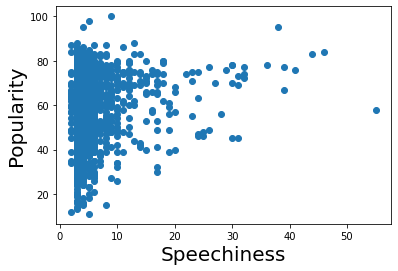

In [14]:
plt.scatter(x3,y) # scatter plot
plt.xlabel('Speechiness', fontsize = 20) # x label
plt.ylabel('Popularity', fontsize = 20) # y label
plt.show() # show plot

In [15]:
x = sm.add_constant(x3) # add constant
results = sm.OLS(y,x).fit() # fit model
results.summary() # show results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     25.16
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           5.74e-07
Time:                        23:13:52   Log-Likelihood:                -8128.1
No. Observations:                1994   AIC:                         1.626e+04
Df Residuals:                    1992   BIC:                         1.627e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.7076      0.483    119.410      0.000      56.760      58.655
Speechiness     0.3642      0.073      5.016      0.000       0.222       0.507
==============================================================================
Omnibus:                       87.282   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.069
Skew:                          -0.540   Prob(JB):                     5.07e-22
Kurtosis:                       2.878   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

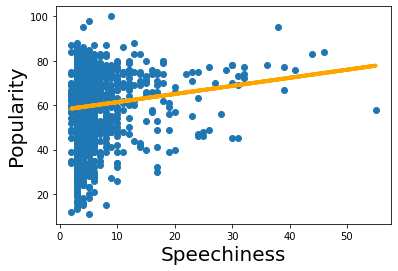

In [16]:
plt.scatter(x3,y) # scatter plot
yhat = 0.3642*x3 + 57.7076
fig = plt.plot(x3,yhat, lw=4, c='orange', label ='regression line') # plot regression line
plt.xlabel('Speechiness', fontsize = 20) # x label
plt.ylabel('Popularity', fontsize = 20) # y label
plt.show() # show plot

As we see the graph, we noted that Danceabilty is the one that make music popular.